In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modele simple

In [5]:
nb_actifs = 20
nb_dates = 256 * 5

idx = pd.Index(np.arange(nb_actifs))

mu = pd.Series(0.05,index=idx) # crée une série avec à gauche les indices (de 0 à 19) et à droite de chaque indice, mu
vols = pd.Series(0.2,index=idx) # idem
correl = 0.7

covar = np.diag(vols) @ pd.DataFrame(correl * np.ones((nb_actifs,nb_actifs)) + (1-correl) * np.eye(nb_actifs),index=idx,columns=idx) @ np.diag(vols)
A = np.linalg.cholesky(covar)

rdts_observes = mu/256 + pd.DataFrame(np.random.randn(nb_dates,nb_actifs)) @ A.T / 16

In [6]:
rdts_observes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.004940,0.004501,0.024176,-0.000341,0.007564,0.004084,0.000449,0.006794,0.012107,-0.000625,-0.006124,0.008199,0.003634,0.016764,0.006057,-0.005676,0.009685,0.005594,0.003428,0.012385
1,-0.013071,-0.013351,0.006397,0.000663,-0.002158,-0.007888,0.010947,0.002564,0.002934,0.002472,-0.002635,-0.003270,-0.007276,0.002508,0.011254,-0.003512,-0.000708,0.007001,-0.013498,0.014384
2,0.011067,0.002961,-0.000242,0.002710,0.008997,0.020063,0.011426,0.002579,-0.000205,0.014991,0.010560,0.012994,0.021100,0.015587,0.007587,0.003859,0.008007,0.010516,0.006604,0.009654
3,0.017431,0.010061,0.011734,0.007441,0.009491,0.010133,0.011461,0.012687,0.006366,0.018970,0.011260,0.025453,0.015899,0.009428,0.022944,0.015787,0.008180,0.024040,0.009566,0.017719
4,-0.019404,-0.030560,-0.029732,-0.019232,-0.018648,-0.014412,-0.019179,-0.022010,-0.016246,-0.016908,-0.012330,-0.023787,-0.021969,-0.034310,-0.019802,-0.021133,-0.004999,-0.010381,-0.006699,-0.003078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-0.005658,-0.013301,0.000122,-0.006373,-0.007362,-0.003831,0.000824,0.008318,-0.003980,0.008372,0.001266,-0.001004,-0.000874,-0.008355,-0.007870,-0.008050,0.000941,-0.018498,-0.004485,0.005943
1276,-0.004164,-0.008957,0.005782,0.003894,-0.013039,0.008476,-0.005919,0.005521,-0.010513,-0.015090,-0.008970,-0.012286,0.012550,-0.003241,0.006712,-0.002222,-0.000021,-0.001964,0.007835,-0.002622
1277,-0.006548,0.001884,-0.003463,-0.007257,0.012962,0.002839,-0.007782,-0.022583,-0.013618,-0.012700,-0.009349,-0.001148,-0.000932,0.000366,-0.004410,0.008761,-0.000155,-0.009196,-0.009111,-0.004776
1278,0.007090,0.012750,-0.002126,-0.003574,0.005433,0.006506,0.014927,0.014671,0.003081,0.002273,0.010636,0.019439,0.024591,0.007260,0.005871,0.011063,0.008382,0.013005,0.010708,0.007712


In [80]:
mu_estime = rdts_observes.mean() * 256
covar_estimee = rdts_observes.cov() * 256
alloc_optimale_in_sample = pd.DataFrame(np.linalg.inv(covar_estimee),index=idx,columns=idx) @ mu_estime

alloc_optimale_in_sample

0     5.242397
1     0.223576
2     4.915247
3     1.151221
4    -2.659472
5    -1.736594
6     2.035782
7    -1.045913
8     7.411770
9    -4.311406
10    1.948782
11    6.957414
12   -3.832388
13   -6.045041
14   -1.789162
15   -6.441429
16   -2.317878
17    4.043000
18   -3.631511
19    4.601219
dtype: float64

In [83]:
alloc_optimale_in_sample_reelle = (100/alloc_optimale_in_sample.sum())*alloc_optimale_in_sample

alloc_optimale_in_sample_reelle.sum()

100.00000000000001

Sharpe = 2.1610548092164055


<AxesSubplot:>

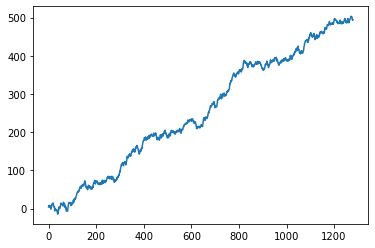

In [84]:
pnl_in_sample = rdts_observes @ alloc_optimale_in_sample_reelle
print('Sharpe = ' + str(pnl_in_sample.mean()/pnl_in_sample.std()*16))
pnl_in_sample.cumsum().plot()

In [48]:
u = pnl_in_sample.cumsum()
u[400]

8.365694234597902

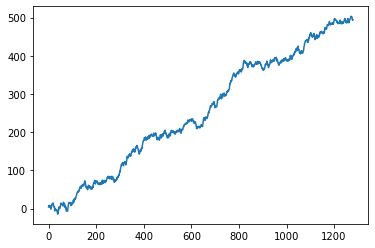

In [94]:
pnl_in_sample.cumsum().plot()
plt.axis('on')
plt.savefig('C:\\Users\\lecle\\Desktop\\ENSAE\\graphique_principal.png')

In [35]:
nb_nouvelles_dates = 256*5

Sharpe = -0.29013493583297206


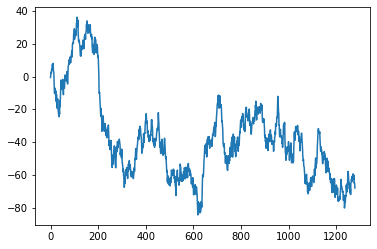

In [95]:
nouveaux_rdts = mu/256 + pd.DataFrame(np.random.randn(nb_nouvelles_dates,nb_actifs)) @ A.T / 16
pnl_out_sample = nouveaux_rdts @ alloc_optimale_in_sample_reelle
print('Sharpe = ' + str(pnl_out_sample.mean()/pnl_out_sample.std()*16))
pnl_out_sample.cumsum().plot()
plt.savefig('C:\\Users\\lecle\\Desktop\\ENSAE\\graphique_principal_2.png')

In [50]:
nb_simu = 1000
pnls_out_sample = pd.DataFrame(mu @ alloc_optimale_in_sample /256 + (np.random.randn(nb_simu,nb_nouvelles_dates,nb_actifs) @ A.T @ alloc_optimale_in_sample.values/ 16)).T

In [53]:
pnls_out_sample.mean()

0      0.002746
1     -0.002952
2      0.000453
3      0.000368
4      0.002144
         ...   
995    0.002122
996    0.007276
997    0.000866
998    0.000137
999   -0.001392
Length: 1000, dtype: float64

In [51]:
sharpes_out_sample = pnls_out_sample.mean() / pnls_out_sample.std() * 16
sharpes_out_sample.describe()

count    1000.000000
mean        0.075632
std         0.443139
min        -1.267710
25%        -0.226848
50%         0.075791
75%         0.375934
max         1.359400
dtype: float64

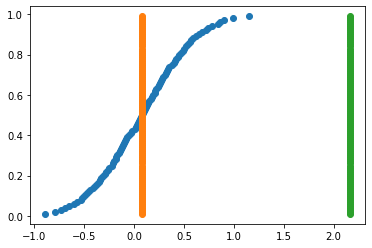

In [93]:
quantiles = sharpes_out_sample.quantile(np.arange(0.01,1.0,0.01)).reset_index().rename({'index':'proba',0:'quantile'},axis=1)
plt.scatter(quantiles['quantile'],quantiles['proba'])
plt.scatter(quantiles['quantile']*0 + sharpes_out_sample.mean(),quantiles['proba'])
plt.scatter(quantiles['quantile']*0 + pnl_in_sample.mean()/pnl_in_sample.std()*16,quantiles['proba'])

#plt.savefig('C:\\Users\\lecle\\Desktop\\ENSAE\\graphique_principal_3.png')

In [59]:
quantile

NameError: name 'quantile' is not defined

# Modele plus avance

In [10]:
nb_signals = 100
nb_dates_in_sample = 1300
nb_dates_out_sample = 260
nb_assets = 80

vol_assets = 0.2/16
correl_assets = 0.8

# vol_signals = 1.0
# correl_signals = 0.0

vol_signals = 0.2/16
correl_signals = 0.8

signal_to_noise = 0.001

rank_betas = 5

cov_assets = vol_assets**2 * pd.DataFrame(correl_assets * np.ones((nb_assets,nb_assets)) + (1-correl_assets)*np.eye(nb_assets))
cov_signals = vol_signals**2 * pd.DataFrame(correl_signals * np.ones((nb_signals,nb_signals)) + (1-correl_signals)*np.eye(nb_signals))

betas = pd.DataFrame(np.random.randn(nb_signals,nb_assets))
betas *= np.sqrt(signal_to_noise * np.trace(cov_assets) / np.trace(betas.T @ cov_signals @ betas))
u,d,v = np.linalg.svd(betas)
betas = pd.concat([pd.DataFrame(d[k] * np.outer(u[:,k],v[k,:]),index=betas.index,columns=betas.columns) for k in range(rank_betas)],keys=range(rank_betas)).groupby(level=1).sum()
betas *= np.sqrt(signal_to_noise * np.trace(cov_assets) / np.trace(betas.T @ cov_signals @ betas))
cov_noise = cov_assets - betas.T @ cov_signals @ betas
d,P = np.linalg.eigh(cov_noise)
cov_noise = pd.DataFrame(P @ np.diag(np.maximum(d,1e-10)) @ P.T)
print('signal to noise = ' + str(np.round(np.trace(betas.T @ cov_signals @ betas) / np.trace(cov_assets),3)))

sqrt_cov_assets = np.linalg.cholesky(cov_assets)
sqrt_cov_signals = np.linalg.cholesky(cov_signals)
sqrt_cov_noise = np.linalg.cholesky(cov_noise)

signal to noise = 0.001


3.374589684610921
-0.1950481281126299


<Axes: >

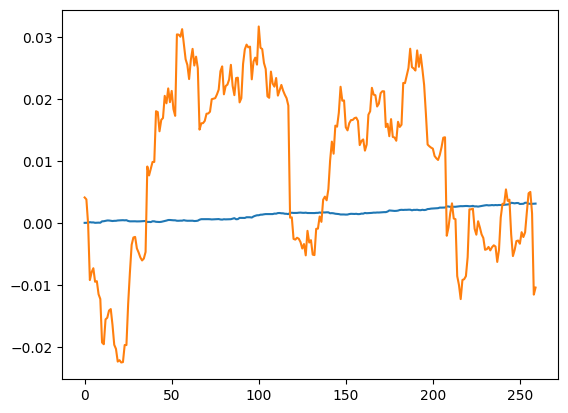

In [13]:
signals = pd.DataFrame(np.random.randn(nb_dates_in_sample,nb_signals) @ sqrt_cov_signals.T)
noise = pd.DataFrame(np.random.randn(nb_dates_in_sample,nb_assets) @ sqrt_cov_noise.T)
assets = signals @ betas+noise

signals_os = pd.DataFrame(np.random.randn(nb_dates_out_sample,nb_signals) @ sqrt_cov_signals.T)
noise_os = pd.DataFrame(np.random.randn(nb_dates_out_sample,nb_assets) @ sqrt_cov_noise.T)
assets_os = signals_os @ betas+noise_os

betas_ols = pd.DataFrame((np.linalg.inv(signals.T @ signals) @ signals.T @ assets).values,index=betas.index,columns=betas.columns)

w_theo = signals_os @ betas
pnl_theo = (w_theo * assets_os).sum(axis=1)

w_ols = signals_os @ betas_ols
pnl_ols = (w_ols * assets_os).sum(axis=1)

print(pnl_theo.mean()/pnl_theo.std()*16)
print(pnl_ols.mean()/pnl_ols.std()*16)

pnl_theo.cumsum().plot()
pnl_ols.cumsum().plot()

In [14]:
sharpes = {}
costs_break_even = {}
for i in range(1000):
    signals = pd.DataFrame(np.random.randn(nb_dates_in_sample,nb_signals) @ sqrt_cov_signals.T)
    noise = pd.DataFrame(np.random.randn(nb_dates_in_sample,nb_assets) @ sqrt_cov_noise.T)
    assets = signals @ betas+noise

    signals_os = pd.DataFrame(np.random.randn(nb_dates_out_sample,nb_signals) @ sqrt_cov_signals.T)
    noise_os = pd.DataFrame(np.random.randn(nb_dates_out_sample,nb_assets) @ sqrt_cov_noise.T)
    assets_os = signals_os @ betas+noise_os

    betas_ols = pd.DataFrame((np.linalg.inv(signals.T @ signals) @ signals.T @ assets).values,index=betas.index,columns=betas.columns)

    w_theo = signals_os @ betas
    pnl_theo = (w_theo * assets_os).sum(axis=1)

    w_ols = signals_os @ betas_ols
    pnl_ols = (w_ols * assets_os).sum(axis=1)

    sharpes[('theo',i)] = pnl_theo.mean()/pnl_theo.std()*16
    sharpes[('ols',i)] = pnl_ols.mean()/pnl_ols.std()*16

sharpes = pd.Series(sharpes).reset_index().rename({'level_0':'method','level_1':'simu',0:'sharpe'},axis=1)

In [17]:
pivot = sharpes.pivot_table(index='simu',columns='method')['sharpe']
means = pivot.mean()
quantiles = pivot.quantile(np.arange(0.01,1.0,0.01))

Text(0.5, 1.0, 'beta theo')

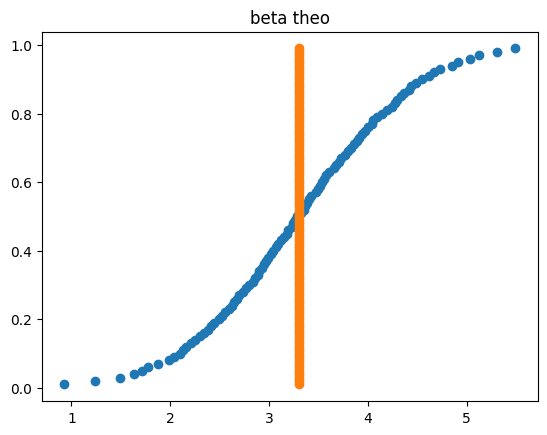

In [18]:
plt.scatter(quantiles['theo'],quantiles.index)
plt.scatter(quantiles['theo']*0+means['theo'],quantiles.index)
plt.title('beta theo')

Text(0.5, 1.0, 'beta ols')

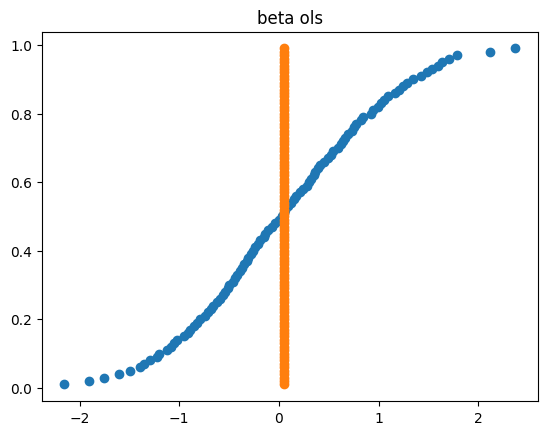

In [19]:
plt.scatter(quantiles['ols'],quantiles.index)
plt.scatter(quantiles['ols']*0+means['ols'],quantiles.index)
plt.title('beta ols')